In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7208

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Confusion Matrix:
[[77 22]
 [21 34]]


Prediction of Diabetes

In [6]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

def predict_diabetes_by_index(index_value, df, model):
    """
    Predicts if data at a specific index falls into the correct category of outcome (0: No Diabetes, 1: Diabetes).

    Args:
    - index_value (int): Index value of the data point in the DataFrame.
    - df (DataFrame): Input DataFrame containing the dataset.
    - model: Trained machine learning model (Random Forest Classifier in this case).

    Returns:
    - prediction (int): Predicted outcome (0 or 1).
    """
    # Exclude the target variable 'Outcome' from the input data
    input_data = df.drop('Outcome', axis=1).iloc[[index_value]].values
    prediction = model.predict(input_data)
    return prediction[0]  # Return the predicted outcome

# Example usage:
index_value = 3 # Index value of the data point you want to predict
predicted_outcome = predict_diabetes_by_index(index_value, df, rf_classifier)

# Print the predicted outcome
if predicted_outcome == 0:
    print("The data at index {} is predicted to be in the category of 'No Diabetes'.".format(index_value))
else:
    print("The data at index {} is predicted to be in the category of 'Diabetes'.".format(index_value))


The data at index 3 is predicted to be in the category of 'No Diabetes'.


In [7]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=5d57bd530ae99bc5d8786cb1fdaa4fc6b5be761aad48c214a4d219387957964d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [8]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, mode='classification', random_state=42)

# Index value of the data point you want to explain
index_value = 3

# Generate explanation for the data point at the specified index
explanation = explainer.explain_instance(X_test.iloc[index_value].values, rf_classifier.predict_proba)

# Show the local explanation
explanation.show_in_notebook()


In [9]:
explanation.as_list()


[('BMI <= 27.10', -0.19521147920728651),
 ('100.00 < Glucose <= 117.00', -0.09101275754000938),
 ('DiabetesPedigreeFunction > 0.61', 0.0840985467180258),
 ('29.00 < Age <= 40.00', 0.06389521615291788),
 ('Pregnancies > 6.00', 0.06139548776084212),
 ('72.00 < BloodPressure <= 80.00', -0.013460525151823822),
 ('Insulin <= 0.00', 0.00997200820053328),
 ('SkinThickness <= 0.00', 0.009764474268565849)]

 Here's how to interpret these tuples:

1. **Feature Conditions:**
   - Each tuple starts with a feature condition, such as 'BMI <= 27.10' or 'Glucose > 100.00 and Glucose <= 117.00'.
   - These conditions represent specific ranges or thresholds for the features in your dataset.

2. **Feature Importance Weights:**
   - The second element in each tuple represents the weight or importance assigned to the corresponding feature condition by LIME.
   - Negative weights indicate that the feature condition has a negative impact on the prediction (pushes away from the predicted class), while positive weights indicate a positive impact (pushes towards the predicted class).

Let's interpret each tuple based on this information:

- **BMI <= 27.10 (Weight: -0.1952):**
  - A lower BMI (Body Mass Index) value (less than or equal to 27.10) has a negative impact on the prediction. This means that lower BMI values are associated with a lower likelihood of diabetes according to this explanation.

- **100.00 < Glucose <= 117.00 (Weight: -0.0910):**
  - Glucose levels in the range of 100.00 to 117.00 have a negative impact on the prediction. This suggests that moderate glucose levels in this range are associated with a lower likelihood of diabetes in this context.

- **DiabetesPedigreeFunction > 0.61 (Weight: 0.0841):**
  - A higher value of the Diabetes Pedigree Function (greater than 0.61) has a positive impact on the prediction. This means that a higher Diabetes Pedigree Function value is associated with a higher likelihood of diabetes.

- **29.00 < Age <= 40.00 (Weight: 0.0639):**
  - Age between 29.00 and 40.00 has a positive impact on the prediction. This indicates that individuals within this age range are more likely to have diabetes according to this explanation.

- **Pregnancies > 6.00 (Weight: 0.0614):**
  - Having more than 6 pregnancies has a positive impact on the prediction. This suggests that a higher number of pregnancies is associated with a higher likelihood of diabetes.

- **72.00 < BloodPressure <= 80.00 (Weight: -0.0135):**
  - Blood pressure in the range of 72.00 to 80.00 has a slight negative impact on the prediction, although the weight is relatively small compared to other features.

- **Insulin <= 0.00 (Weight: 0.0100):**
  - Insulin levels at or below 0.00 have a positive impact on the prediction, but the weight is relatively small.

- **SkinThickness <= 0.00 (Weight: 0.0098):**
  - Skin thickness at or below 0.00 has a positive impact on the prediction, but again, the weight is relatively small.

These interpretations provide insights into how specific ranges or conditions of features influence the model's prediction for diabetes. It's important to note that these interpretations are based on the local explanation provided by LIME and may vary for different data points or contexts.


In [10]:
pip install shap

In [11]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

In [12]:
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

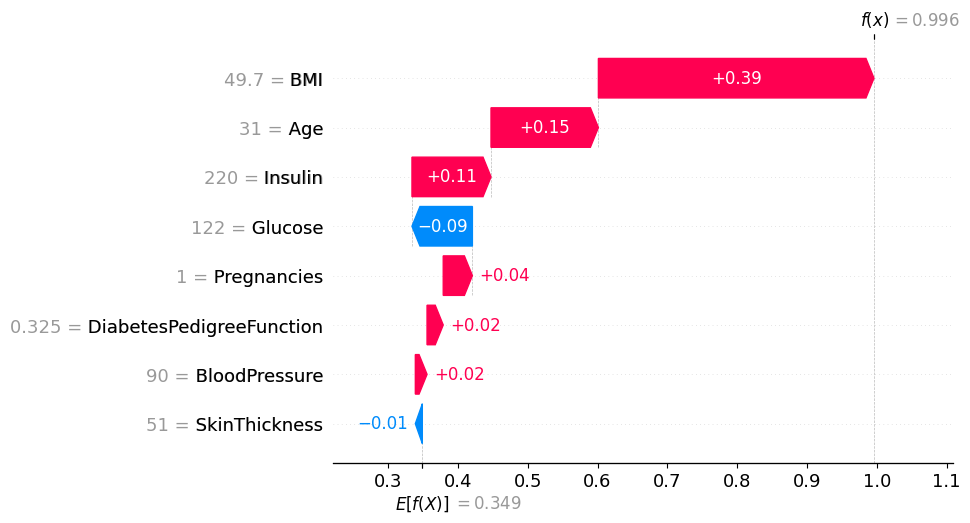

In [14]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[99])

## Purpose of Waterfall Plot:

The waterfall plot visualizes the contributions of each feature to the model's prediction for a specific instance (data point).
## Vertical Bars:

Each vertical bar in the plot represents a feature's contribution to the prediction.
The length of the bar indicates the magnitude of the SHAP value for that feature. Positive SHAP values push the prediction towards the positive class, while negative SHAP values push it towards the negative class.
## Baseline Value:

The plot starts with a baseline value, which is usually the model's average prediction across the dataset or a specific reference point.
The baseline value is represented by the starting point of the plot (often at 0).
## Feature Contributions:

As you move along the plot from left to right, each bar shows how much the corresponding feature contributed to the prediction compared to the baseline.
Positive bars (to the right of the baseline) indicate features that increase the prediction, while negative bars (to the left of the baseline) indicate features that decrease the prediction.
## Final Prediction:

The final position of the plot (after considering all feature contributions) represents the model's prediction for the specific instance.
By summing up the contributions (bars) along the plot, you can see how the model arrived at its prediction for that instance.
## Interpretation:

The waterfall plot allows you to understand which features had the most significant impact on the prediction and whether they pushed the prediction towards the positive or negative class.
It helps in explaining why the model made a specific prediction for that particular data point.
## Here's an example interpretation:

If you see a long bar extending to the right, it indicates that a specific feature had a strong positive impact, increasing the prediction towards the positive class.
Conversely, a long bar extending to the left suggests a strong negative impact, pushing the prediction towards the negative class.

In [15]:
import shap

# Initialize the JavaScript libraries for SHAP plots
shap.initjs()

shap.plots.force(shap_values[0])


The `shap.plots.force` function in SHAP generates a force plot that provides a detailed and interactive visualization of the individual prediction's explanations using SHAP values. When you use `shap.plots.force(shap_values[0])`, it creates a force plot specifically for the first observation in your dataset. Let's break down how to interpret a force plot:

1. **Overall Prediction:**
   - At the top of the force plot, you will see the model's overall prediction for the specific instance (data point) being explained. It's usually represented as a bar or a point on the plot.

2. **Feature Contributions:**
   - The vertical bars below the prediction represent the contributions of different features to the overall prediction.
   - Each bar's length corresponds to the magnitude of the SHAP value for that feature. Positive SHAP values push the prediction towards the positive class, while negative SHAP values push it towards the negative class.

3. **Interactions and Dependencies:**
   - The force plot also shows how features interact and depend on each other to influence the prediction.
   - Connections between bars indicate interactions between features. For example, if changing one feature's value impacts another feature's impact on the prediction, this interaction is visually represented.

4. **Color Coding:**
   - The bars are often color-coded to indicate the direction of impact: green for positive impact (increasing prediction) and red for negative impact (decreasing prediction).
   - This color scheme helps quickly identify which features contribute positively or negatively to the prediction.

5. **Base Value:**
   - The baseline or base value represents the model's average prediction across the dataset or a specific reference point. It's usually shown as a horizontal line or reference point on the plot.

6. **Detailed Feature Information:**
   - Hovering over individual bars or points in the force plot often reveals more detailed information about the feature, its value, and its impact on the prediction.
   - This interactive feature of force plots allows for a deeper exploration of feature contributions.

By analyzing a force plot, you can gain insights into:
- Which features had the most significant impact on the model's prediction for a specific instance.
- How these features interact and influence each other in the prediction process.
- The direction and magnitude of each feature's contribution to the prediction (positive or negative).

The force plot provides a comprehensive and intuitive view of the factors driving individual predictions, making it a valuable tool for understanding model decisions and ensuring transparency in machine learning models.

In [16]:
shap.initjs()
shap.plots.force(shap_values[0:100])


Interpreting a force plot generated by SHAP (SHapley Additive exPlanations) involves understanding the contributions of individual features to the model's predictions for each data point.interpreting a force plot:

1. **Overall Prediction Bar:**
   - At the top of the force plot, you will typically see a bar or a point representing the overall prediction made by the model for the specific data point(s) being analyzed. This bar is usually centered around the expected value or average prediction.

2. **Feature Contributions:**
   - Below the overall prediction bar, you will see individual bars representing the contributions of different features to the prediction.
   - Each feature bar's length corresponds to the magnitude of the SHAP value for that feature. Positive SHAP values push the prediction towards the positive class, while negative SHAP values push it towards the negative class.

3. **Interactions and Dependencies:**
   - Connections between bars indicate interactions between features. If changing one feature's value impacts another feature's impact on the prediction, this interaction is visually represented.
   - For multiple data points (as in your case, the first 100 observations), you will see separate sets of bars for each data point, allowing you to compare their feature contributions.

4. **Color Coding:**
   - The bars are often color-coded to indicate the direction of impact: green for positive impact (increasing prediction) and red for negative impact (decreasing prediction).
   - This color scheme helps quickly identify which features contribute positively or negatively to the prediction.

5. **Base Value:**
   - The baseline or base value represents the model's average prediction across the dataset or a specific reference point. It's usually shown as a horizontal line or reference point on the plot.
   - Differences between individual predictions and the baseline value are reflected in the feature contributions.

6. **Individual Data Points:**
   - For each data point (in this case, the first 100 observations), the force plot shows how features contribute to the model's prediction for that specific instance.
   - By examining the feature bars for each data point, you can understand which features had the most significant impact on the predictions and how they influenced the model's decisions.

When interpreting a force plot:
- Look for features with long bars that extend far from the baseline, as they have a strong influence on the prediction.
- Check for interactions between features, indicated by connections between bars, to understand how features collaborate in making predictions.
- Compare the feature contributions across different data points to identify patterns or inconsistencies in the model's behavior.

Overall, the force plot provides a comprehensive view of how features contribute to individual predictions, making it a valuable tool for model interpretation and understanding the factors driving the model's decisions.



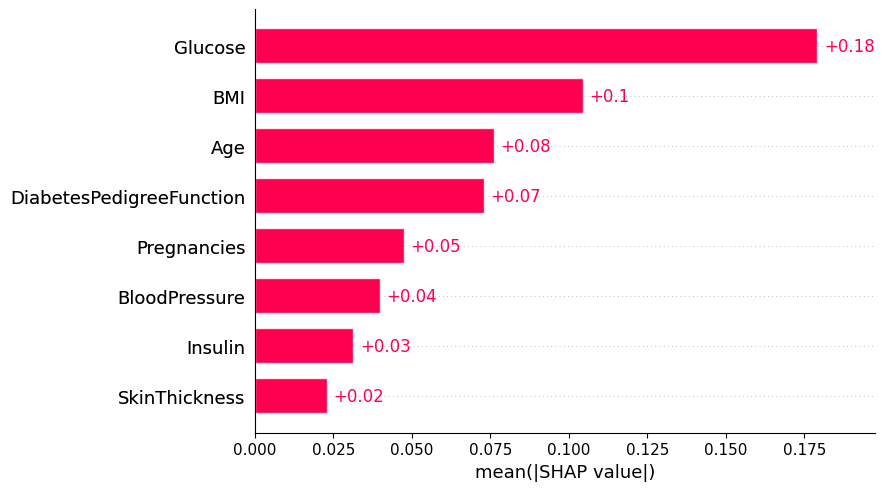

In [17]:
shap.plots.bar(shap_values)


The `shap.plots.bar` function in SHAP generates a bar plot that displays the average absolute SHAP values for each feature, providing insights into the overall importance of features in the model's predictions.

1. **Feature Importance:**
   - Each bar in the plot represents a feature, and the height of the bar indicates the average absolute SHAP value for that feature across the dataset.
   - Higher bars indicate features that, on average, have a larger impact on the model's predictions.

2. **Direction of Impact:**
   - The color of the bars can indicate the direction of impact:
     - Blue bars represent features that have a positive impact on predictions (increasing the output).
     - Red bars represent features that have a negative impact on predictions (decreasing the output).

3. **Magnitude of Impact:**
   - The length of the bars reflects the magnitude of the impact a feature has on predictions.
   - Longer bars indicate features that contribute significantly to the model's decision-making process.

4. **Relative Importance:**
   - Comparing the lengths of different bars allows you to assess the relative importance of features.
   - Features with longer bars are more influential in the model's predictions, while shorter bars indicate less influence.

5. **Model Insights:**
   - Analyzing the bar plot helps identify which features the model relies on the most when making predictions.
   - It can highlight key factors driving the model's decisions and provide insights into the underlying patterns learned by the model from the data.

6. **Feature Selection and Interpretation:**
   - Feature importance from SHAP values can guide feature selection or feature engineering efforts.
   - Understanding the importance of features can also aid in model interpretation and explaining why certain predictions are made by the model.

When interpreting the bar plot:
- Focus on features with longer bars, as they have a stronger impact on predictions.
- Consider the direction of impact (blue for positive, red for negative) to understand how each feature influences the model's output.
- Use the bar plot to prioritize features for further analysis or feature engineering based on their importance.

Overall, the bar plot based on SHAP values provides a clear visualization of feature importance, helping in model understanding, interpretation, and decision-making related to feature selection or model improvements.

If you have specific features or insights from the bar plot that you'd like to discuss further, feel free to provide more details!

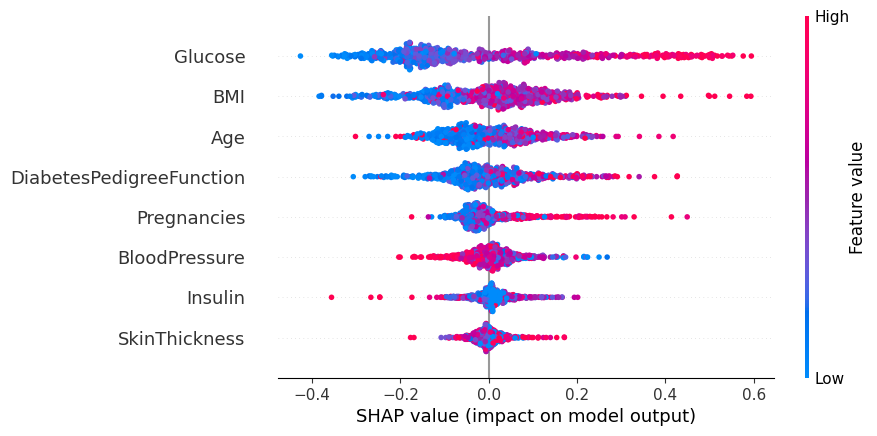

In [18]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

The `shap.plots.beeswarm` function in SHAP generates a beeswarm plot that visualizes the distribution of SHAP values for each feature across the dataset.

1. **Feature Importance Distribution:**
   - The beeswarm plot displays individual data points (representing SHAP values) for each feature, arranged along the y-axis based on their absolute magnitude.
   - Features with a wide spread of points indicate a diverse range of impacts on model predictions across the dataset.

2. **Center Line (Zero Impact):**
   - The center line (often at zero) represents the baseline or no impact level. Points to the left (negative side) of the center line indicate features that tend to decrease predictions, while points to the right (positive side) indicate features that tend to increase predictions.

3. **Dense Regions vs. Sparse Regions:**
   - Dense regions of points for a feature suggest that the feature has a consistent impact on predictions across many data points.
   - Sparse regions or outliers may indicate instances where a feature's impact deviates significantly from the norm.

4. **Outliers and Extreme Impacts:**
   - Outliers in the plot (points far from the center line) represent instances where a feature has an extreme impact on the model's predictions.
   - Analyzing these outliers can provide insights into specific data points or scenarios where certain features strongly influence the model's decisions.

5. **Feature Correlations and Interactions:**
   - Clusters or patterns in the plot may indicate correlations or interactions between features.
   - Features that consistently appear together in certain regions of the plot may have interdependencies that affect predictions.

6. **Identifying Influential Features:**
   - By observing the spread and concentration of points for each feature, you can identify which features are most influential in driving predictions across the dataset.
   - Features with a larger spread or higher density of points are typically more impactful in the model's decision-making process.

When interpreting the beeswarm plot:
- Look for features with dense clusters of points away from the center line, as they indicate consistent and significant impacts on predictions.
- Identify outliers or extreme points, as they represent instances where specific features have a pronounced influence on individual predictions.
- Consider the overall distribution of points for each feature to understand their relative importance and variability in impacting model predictions.

The beeswarm plot is particularly useful for exploring the distribution and variability of feature impacts derived from SHAP values, providing a deeper understanding of how features contribute to model predictions across different data points.

